### Script zur Ausgabe der Top 30 des Wordcounts

In [ ]:
import sys
import re
from operator import add

from pyspark import SparkContext


def map_phase(x):
    x = re.sub('--', ' ', x)
    x = re.sub("'", '', x)
    return re.sub('[?!@#$\'",.;:()]', '', x).lower().split(' ')


def pass_filter(x):
    return (len(x) > 0 or x != " " or x != None)


if __name__ == "__main__":
    if len(sys.argv) < 3:
        print >> sys.stderr, "Usage: wordcount <master> <file>"
        exit(-1)
    sc = SparkContext(sys.argv[1], "PythonWordCountSorted")
    lines = sc.textFile(sys.argv[2], 1)
    counts = lines.flatMap(map_phase) \
                  .map(lambda x: (x, 1)) \
                  .reduceByKey(add) \
                  .filter(pass_filter)
    output = counts.map(lambda kv: (kv[1], kv[0])).sortByKey(False).take(30)
    for index, (count, word) in enumerate(output, start=1):
        print(index, "Count and Word: ", (count, word))


### Ergebnis

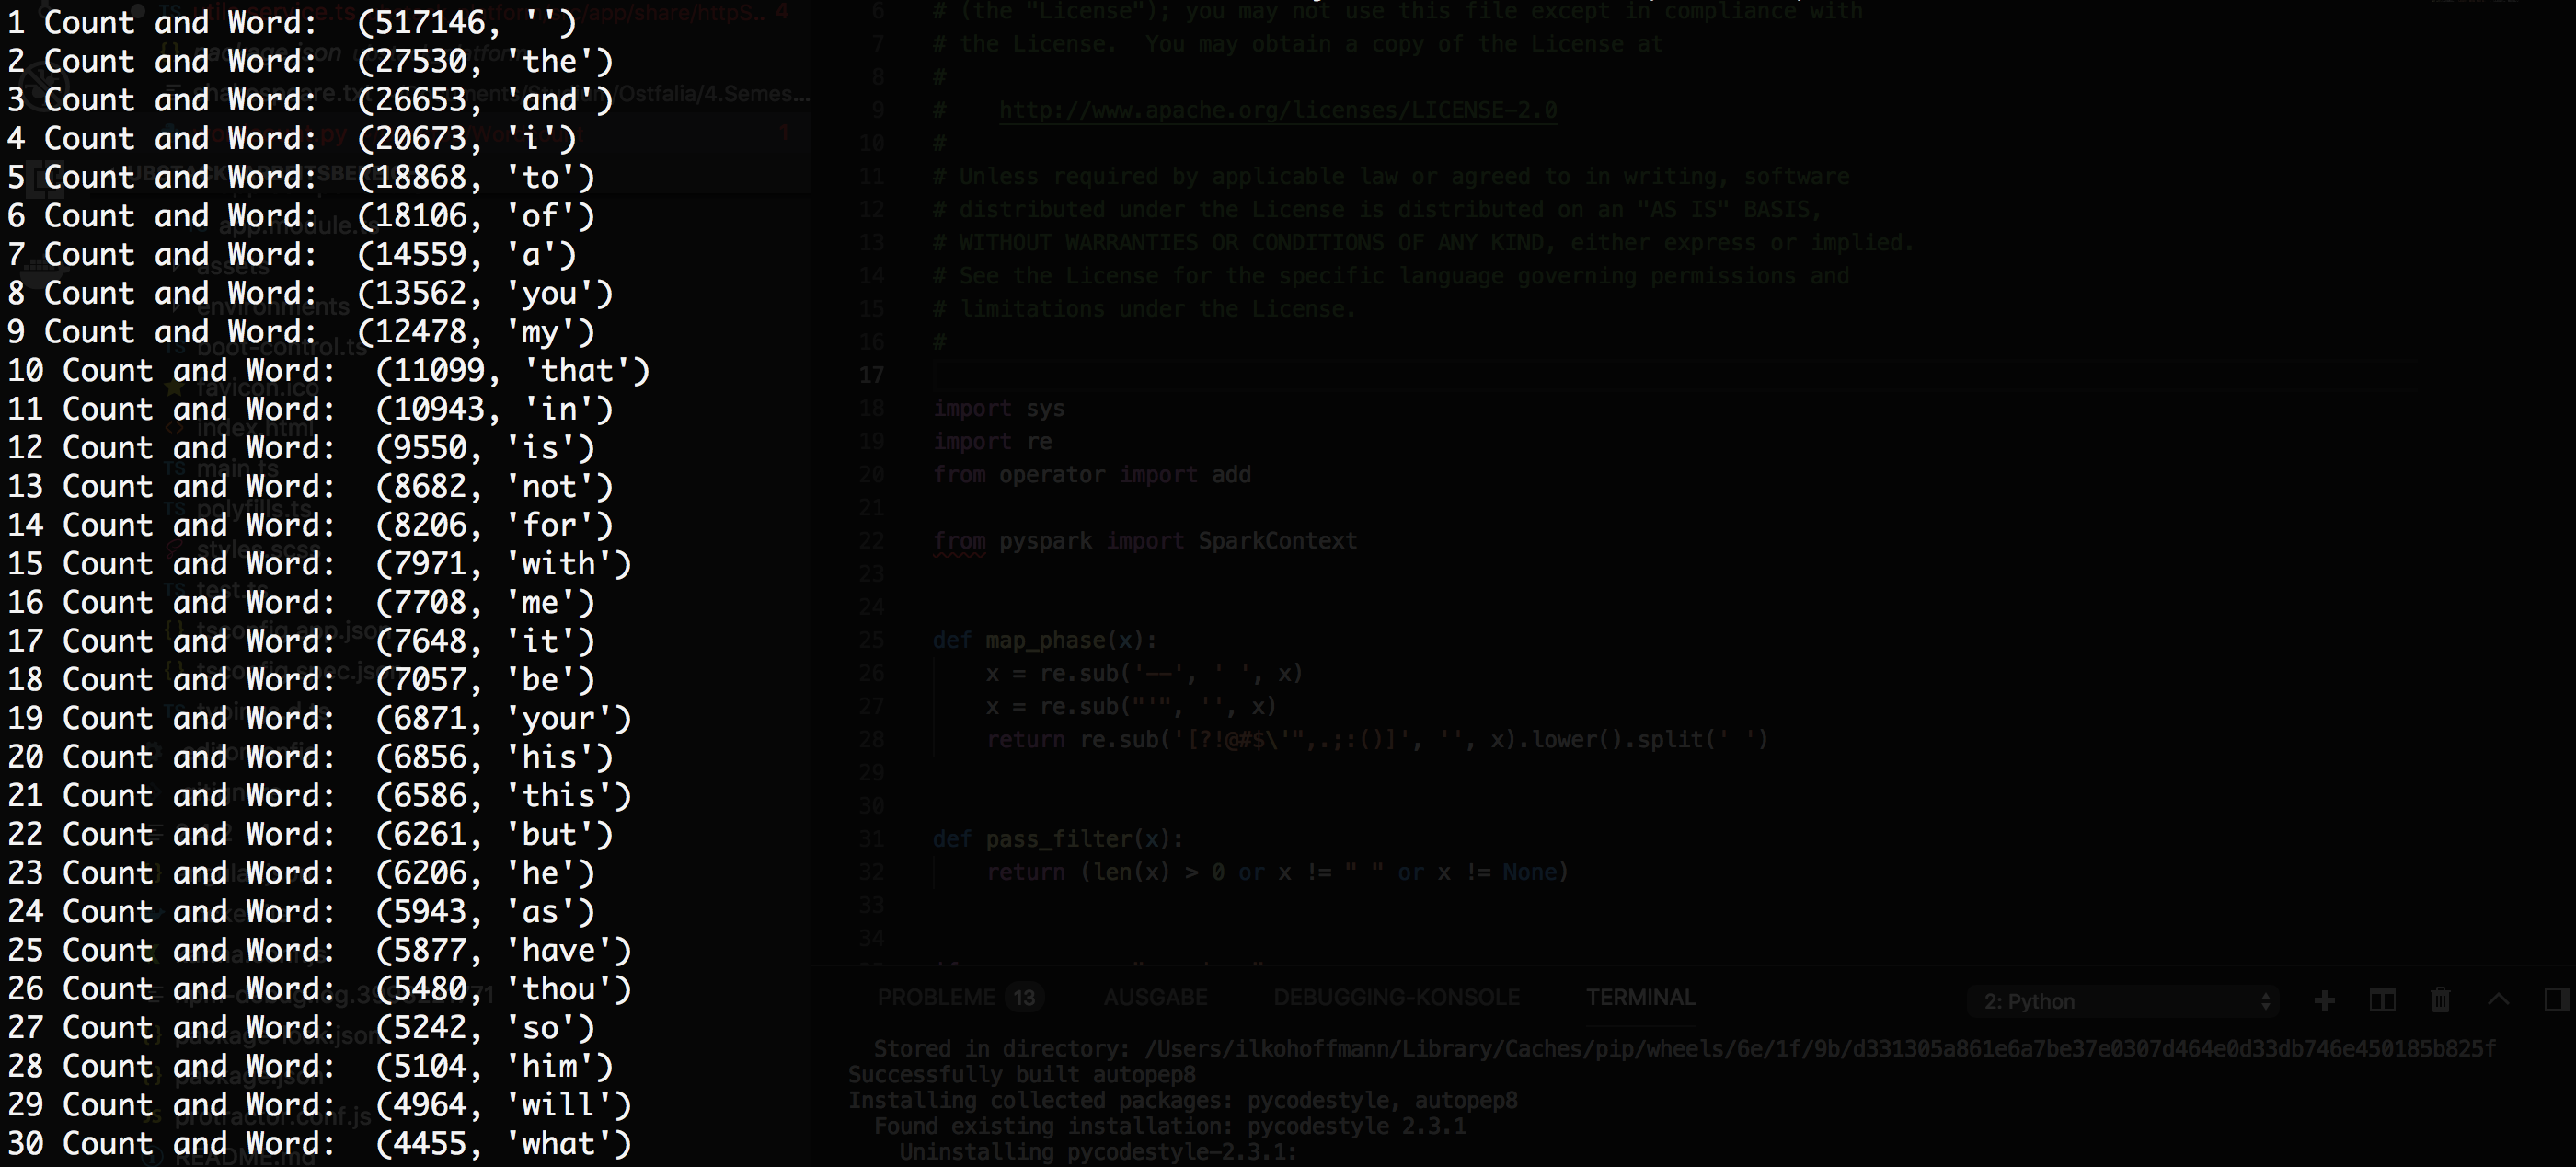